## Audio classification using CNNs

## Generate Spectrogram



The "Sounds" directory contains subdirectories named "background," "chainsaw," "engine," and "storm." Each subdirectory contains 100 WAV files. The WAV files in the "background" directory contain rainforest background noises only, while the files in the other subdirectories include the sounds of chainsaws, engines, and thunderstorms overlaid on the background noises. These WAV files were generated by using a soundscape-synthesis package named Scaper to combine sounds in the public UrbanSound8K dataset with rainforest sounds obtained from YouTube.

In [2]:
## Just Run the below code-block

import numpy as np
import librosa.display, os
import matplotlib.pyplot as plt
%matplotlib inline

def spectrogram_creation(audio_file, image_file):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    y, sr = librosa.load(audio_file)
    ms = librosa.feature.melspectrogram(y=y, sr=sr)
    log_ms = librosa.power_to_db(ms, ref=np.max)
    librosa.display.specshow(log_ms, sr=sr)

    fig.savefig(image_file)
    plt.close(fig)

def save_spectograms(input_path, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    dir = os.listdir(input_path)

    for i, file in enumerate(dir):
        input_file = os.path.join(input_path, file)
        output_file = os.path.join(output_path, file.replace('.wav', '.png'))
        spectrogram_creation(input_file, output_file)

In [3]:
save_spectograms("storm/","images/storm/")
save_spectograms("background/","images/background/")
save_spectograms("chainsaw/","images/chainsaw/")
save_spectograms("engine/","images/engine/")

In [ ]:
from tensorflow.keras.preprocessing import image
import glob
import cv2
def loading_spectrograms(path, label):
    files = glob.glob(path + '/*')
    img_height = 224
    img_width = 224
    images = []
    labels = []
    for a in files:
        image = cv2.imread(a)
        image = cv2.resize(image, (img_width,img_height))
        image = image / 255.0
        images.append(image)
        labels.append(label)
    del files


    return images, labels

def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i])

x = []
y = []


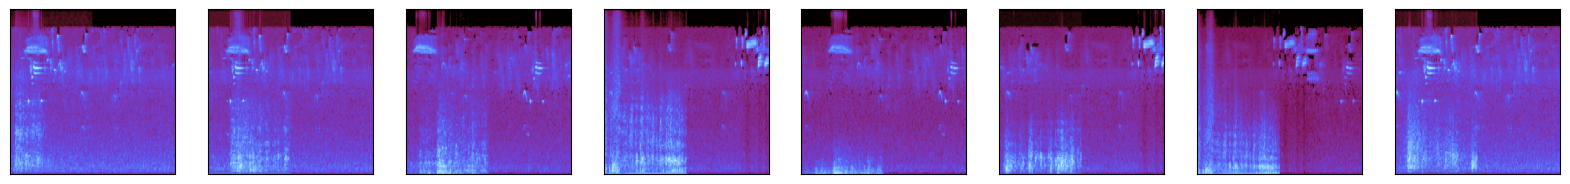

In [ ]:
## load each directory's images and label:
'''
suggested classes for each directory:
background -> 0
chainsaw -> 1
engine -> 2
storm -> 3
'''

x = []
y = []
images, labels = loading_spectrograms('images/background/',0)
x.extend(images)
y.extend(labels)

images, labels = loading_spectrograms('images/chainsaw/',1)
x.extend(images)
y.extend(labels)

images, labels = loading_spectrograms('images/engine/',2)
x.extend(images)
y.extend(labels)

images, labels = loading_spectrograms('images/storm/',3)
x.extend(images)
y.extend(labels)

x = np.array(x, dtype=np.float32)
y = np.array(y, dtype=np.int32)
show_images(images)

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Build and train a CNN

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense

model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=128,kernel_size=(3, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=128,kernel_size=(3, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=128,kernel_size=(3, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(1024, activation='relu'),
    Dense(4, activation='softmax')
])
model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_31 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 109, 109, 128)  │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 54, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 52, 52, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1024)           │    18,875,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 4)              │         4,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,212,548 (73.29 MB)

 Trainable params: 19,212,548 (73.29 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
hist = model.fit(X_train,y_train,epochs=50,batch_size=32,validation_split=.2,verbose=1)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 200ms/step - accuracy: 0.2828 - loss: 6.5301 - val_accuracy: 0.3750 - val_loss: 3.9346
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.3053 - loss: 4.6272 - val_accuracy: 0.3750 - val_loss: 4.7035
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.3741 - loss: 2.8062 - val_accuracy: 0.6094 - val_loss: 2.1591
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.4868 - loss: 1.8134 - val_accuracy: 0.6562 - val_loss: 0.9921
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.5584 - loss: 0.9286 - val_accuracy: 0.6719 - val_loss: 0.9007
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.6296 - loss: 0.8288 - val_accuracy: 0.6250 - val_loss: 1.0435
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.6964 - loss: 0.7400 - val_accuracy: 0.7344 - val_loss: 0.7379
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.7758 - loss: 0.5664 - val_accuracy: 0.7344 - val_loss: 0.5811

#### Training and validation accuracy plot

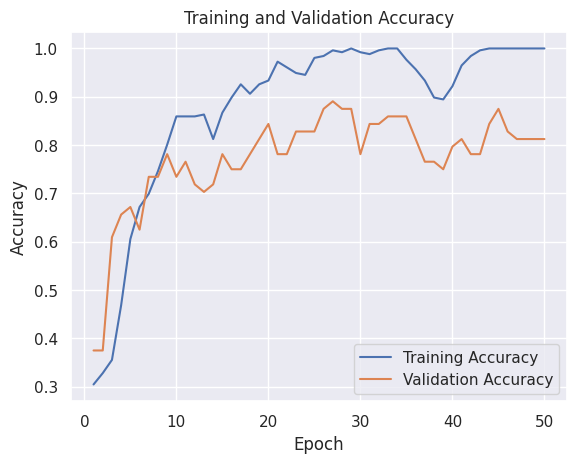

In [ ]:

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, '-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay

def plot_confusion_mat(predictions,y_test1,title):
    cm = confusion_matrix(y_test1, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap = 'magma')
    plt.savefig('images/'+title+'.png')
    plt.show()

    accuracy = accuracy_score(y_test1, predictions)

    print(f'Accuracy: {accuracy:.4f}')

### Confusion matrix

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step


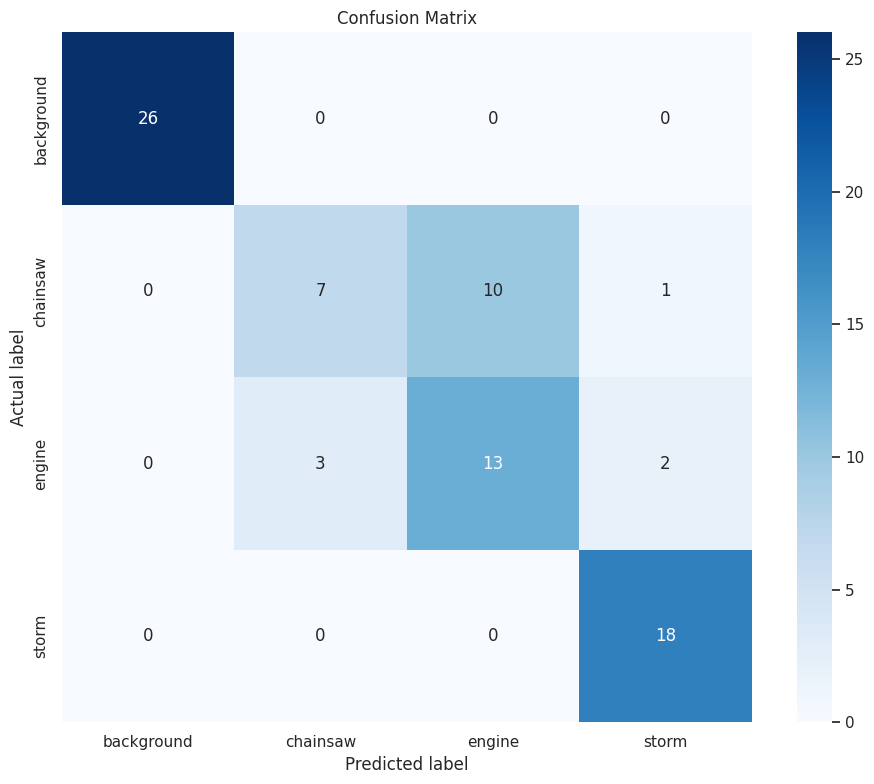

In [70]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

predictions1 = model.predict(X_test)
predictions = np.argmax(predictions1, axis=1)

mat = confusion_matrix(y_test, predictions)

class_labels = ['background', 'chainsaw', 'engine', 'storm',]

plt.figure(figsize=(10, 8))
sns.heatmap(mat, square=True, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.title("Confusion Matrix")
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.tight_layout()
plt.show()


In [54]:
test_loss, test_acc = model.evaluate(X_test,y_test, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")

Test accuracy: 0.8125
